# EE 461P: Data Science Principles
# Assignment 4
## Total points: 70
## Due: Tuesday, April 7th, submitted via Canvas by 11:59 pm

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Please ensure that the notebook you have uploaded on Canvas is the correct one, you could download the notebook from Canvas to double check that you have submitted the correct version on your notebook.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Adit Jain (aj27923)
2. Blake Adams (baa2326)

# 1. Naive-Bayes (5pts)

Given all the previous patients I've seen (below are their symptoms and diagnosis)

\begin{array}{ccc}
\text{Chills}&\text{Runny Nose}&\text{Headache}&\text{Fever}&\text{Flu}\\
-------&-------&-------&-------&-------&\\
Y&N&\text{Mild}&Y&N\\
Y&Y&\text{No}&N&Y\\
Y&N&\text{Strong}&Y&Y\\
N&Y&\text{Mild}&Y&Y\\
N&N&\text{No}&N&N\\
N&Y&\text{Strong}&Y&Y\\
N&Y&\text{Strong}&N&N\\
Y&Y&\text{Mild}&Y&Y\\
\end{array}

Do you believe that a patient with the following symptoms has the flu?
\begin{array}{ccc}
\text{Chills}&\text{Runny Nose}&\text{Headache}&\text{Fever}&\text{Flu}\\
-------&-------&-------&-------&-------&\\
\text{Y}&\text{N}&\text{Mild}&\text{Y}&\text{?}\\
\end{array}

# Solution 1

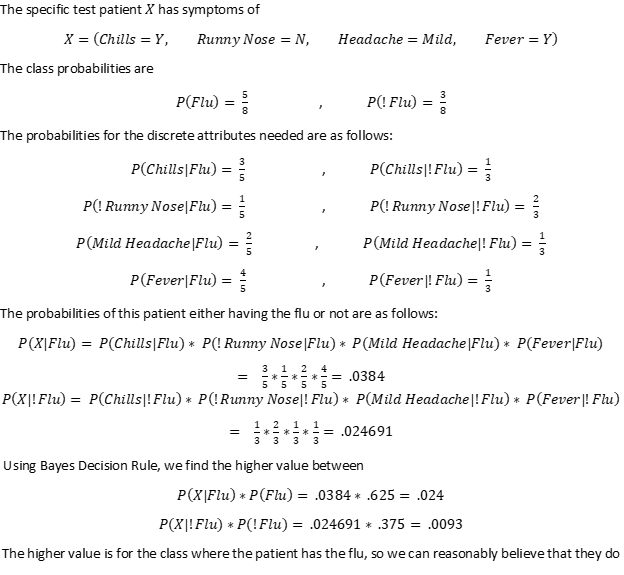

# 2. Bayesian Belief Network (15 pts)

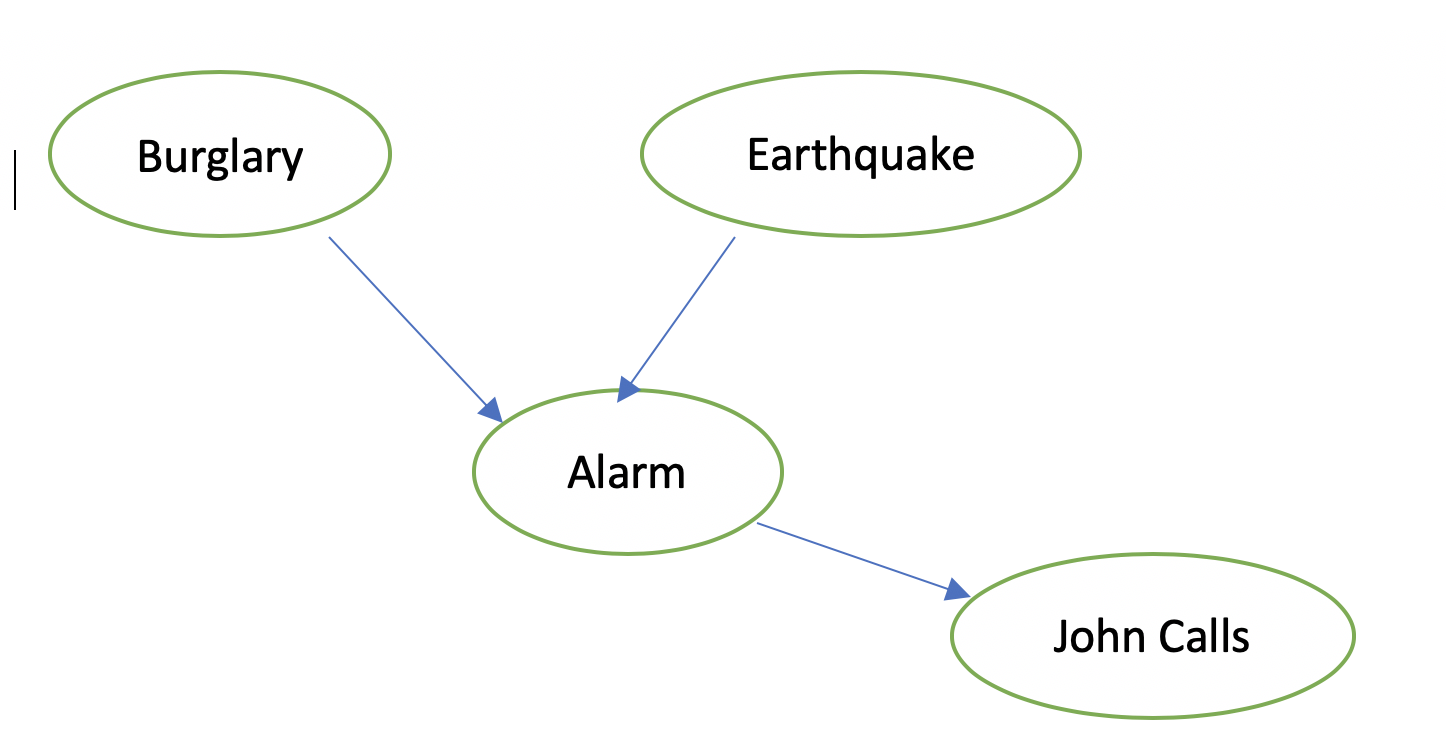

In [1]:
from IPython.display import Image
Image(filename='BBN.png',retina=True)



All nodes are binary and can take 0/1 values

The probabilities are given below:

P(Burglary = 1) = .001   
P(Earthquake = 1) = .0.002


P(Alarm = 1 | Burglary = 0, Earthquake = 0) = .001  
P(Alarm = 1 | Burglary = 0, Earthquake = 1) = .29  
P(Alarm = 1 | Burglary = 1, Earthquake = 0) = .94  
P(Alarm = 1 | Burglary = 1, Earthquake = 1) = .95

P(John Calls = 1 | Alarm = 1) = .9  
P(John Calls = 1 | Alarm = 0) = .05

For the given Bayesian network, Compute the following probabilities : 


**(a) (4 pts)** Find the probability that  John Calls = 1 

**(b) (4 pts)** Given that there is no Earthquake, what is the probability that Alarm rings(Alarm = 1)

**(c) (7 pts)** Given that Alarm rings(Alarm = 1), what is the probability that the Burglary happened (Burglary = 1)


# Solution 2

a) 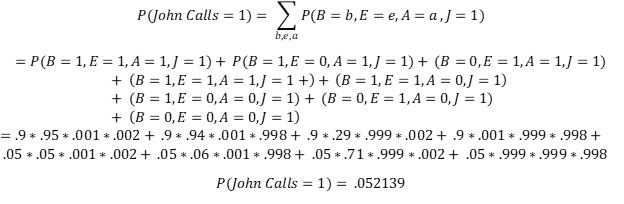

b) 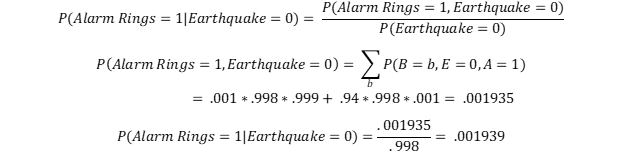

C) 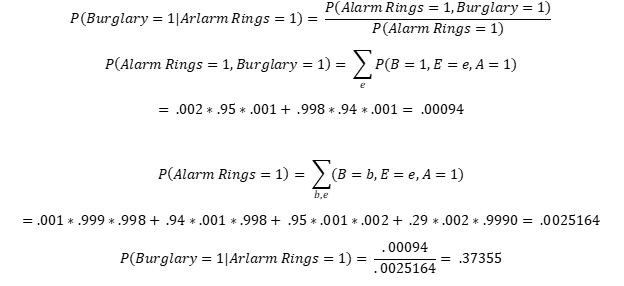

# 3. Logistic Regression (10 pts)
We are studying the performance of students  in a mathematics competition. We have the variables X1 = hours the student prepared for, X2 = math GPA and Y = make it to the finals (binary). We fit a logistic regression and produce estimated coefficients, βˆ0 = −6, βˆ1 = 0.05, βˆ2 = 1. \\
**(a) (5 pts)** Estimate the probability that George who prepares for 40 hours and
has a GPA of 3.5 will make it to the finals. \\
**(b) (5 pts)** How many more hours would George (the student in part (a)) need to prepare to have a 50 % chance of making it to the finals?

# Solution 3

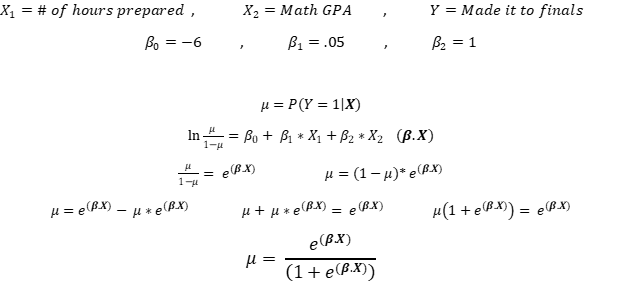

a)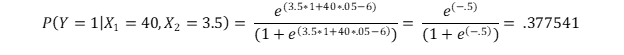

b) 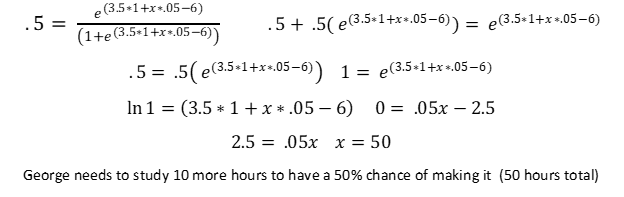

# 4. Classification using MLP, Naive Bayes and Logistic Regression. (40 pts)
You have to build an MLP model for the following dataset https://www.kaggle.com/wendykan/lending-club-loan-data

Since the dataset is really huge, we will use only a certain set of features and samples to build our model. We will also use only two classes instead of all.

The modified dataset with reduced number of samples has been prepared for your use. The file can be downloaded using the code below. You can also find it [here](https://drive.google.com/file/d/1Gv_N1rHLqDizxUck6l06BfniR30Pw0Zs/view?usp=sharing) in case you have a different environment and this code does not run.



In [2]:
%%bash
ggID='1Gv_N1rHLqDizxUck6l06BfniR30Pw0Zs'  
ggURL='https://drive.google.com/uc?export=download'  
filename="$(curl -sc /tmp/gcokie "${ggURL}&id=${ggID}" | grep -o '="uc-name.*</span>' | sed 's/.*">//;s/<.a> .*//')"  
getcode="$(awk '/_warning_/ {print $NF}' /tmp/gcokie)"  

curl -Lb /tmp/gcokie "${ggURL}&confirm=${getcode}&id=${ggID}" -o "${filename}"  

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1483      0 --:--:-- --:--:-- --:--:--  1483
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  139M    0  139M    0     0  5217k      0 --:--:--  0:00:27 --:--:-- 5679k


In [3]:
import os, sys, re
from keras.models import Sequential
from keras.layers import Dense
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn import naive_bayes
import seaborn as sns





Using TensorFlow backend.


In [4]:
dataset = pd.read_csv('loan.csv')
df = dataset.fillna(0)



/Users/aditjain/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Since the feature set is very huge, we will be using only the below columns for building our model.**

In [5]:
def LoanResult(status):
    if (status == 'Fully Paid') or (status == 'Current'):
        return 1
    else:
        return 0

df['loan_status'] = df['loan_status'].apply(LoanResult)





In [6]:
df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
             'emp_length', 'home_ownership','annual_inc', 'verification_status', 'loan_status',
             'purpose','addr_state', 'dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
             'initial_list_status', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
             'application_type', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'chargeoff_within_12_mths',
             'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag']]



**(a) (1pt)** Print the first five rows in the dataset. \\
**(b) (1 pt)** The 'loan_status' column is the target label which our model needs to learn to predict. Print all the unique values the loan_status feature can take. \\
**(c) (2 pts)** Convert the features with categorical values into numeric values. \\
**(d) (6 pts)** Split the data into training/test data with test_size = 0.25.
Build a sequential model using Binary cross entropy loss. Try training the model with different hyperparameters (number of layers, optimizer, learning rate, batch size etc; but its sufficient if you provide the code for the model with highest test accuracy) https://www.tensorflow.org/guide/keras/overview \\
(You can use the MLPClassifier in scikit-learn library, but Keras is a simple neural network library with a lot of built in features. Starting to use Keras might be useful for further homeworks and for your projects as well.) 
https://docs.google.com/presentation/d/1ozbZ5SD7m-xb3qAd_bcx6wG3hxYeAQgMXziVzLgr3F4/edit?usp=sharing  
**(e) (3 pts)** Report the accuracy, F1 score and AUROC on the test set.  
**(f) (6x2=12 pts)** Similarly, use Naive Bayes and Logistic Regression classifier and report the accuracy, F1 score and AUROC on the test set. Also, plot the ROC curve for each model.  



# PART A


In [7]:
# part a
df.head(5)




,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_d,last_pymnt_amnt,application_type,tot_coll_amt,tot_cur_bal,avg_cur_bal,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,10+ years,RENT,...,Feb-2019,84.92,Individual,0.0,16901.0,1878.0,0.0,1.0,0.0,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,10+ years,MORTGAGE,...,Feb-2019,777.23,Individual,1208.0,321915.0,24763.0,0.0,1.0,0.0,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,6 years,MORTGAGE,...,Feb-2019,180.69,Individual,0.0,110299.0,18383.0,0.0,0.0,0.0,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,10+ years,MORTGAGE,...,Feb-2019,146.51,Individual,686.0,305049.0,30505.0,0.0,0.0,0.0,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,10+ years,MORTGAGE,...,Feb-2019,731.78,Individual,0.0,116007.0,9667.0,0.0,0.0,0.0,N


# PART B

In [8]:
# part b
print(df.loan_status.unique())



[1 0]


In [9]:
df.dtypes




loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv             float64
term                         object
int_rate                    float64
installment                 float64
grade                        object
sub_grade                    object
emp_length                   object
home_ownership               object
annual_inc                  float64
verification_status          object
loan_status                   int64
purpose                      object
addr_state                   object
dti                         float64
open_acc                    float64
pub_rec                     float64
revol_bal                     int64
revol_util                  float64
initial_list_status          object
recoveries                  float64
collection_recovery_fee     float64
last_pymnt_d                 object
last_pymnt_amnt             float64
application_type             object
tot_coll_amt                float64
tot_cur_bal                 

# PART C

In [10]:
# part c
for column in df.columns:
    if(df[column].dtype == 'object'):
        df[column] = df[column].astype('category')
        
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df.head()



,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_d,last_pymnt_amnt,application_type,tot_coll_amt,tot_cur_bal,avg_cur_bal,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,2500,2500,2500.0,0,13.56,84.92,2,10,2,3,...,3,84.92,0,0.0,16901.0,1878.0,0.0,1.0,0.0,0
1,30000,30000,30000.0,1,18.94,777.23,3,16,2,1,...,3,777.23,0,1208.0,321915.0,24763.0,0.0,1.0,0.0,0
2,5000,5000,5000.0,0,17.97,180.69,3,15,7,1,...,3,180.69,0,0.0,110299.0,18383.0,0.0,0.0,0.0,0
3,4000,4000,4000.0,0,18.94,146.51,3,16,2,1,...,3,146.51,0,686.0,305049.0,30505.0,0.0,0.0,0.0,0
4,30000,30000,30000.0,1,16.14,731.78,2,13,2,1,...,3,731.78,0,0.0,116007.0,9667.0,0.0,0.0,0.0,0


# PART D + E + F

In [36]:
# part d
y = df['loan_status']
x = df.drop(['loan_status'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
#y_test_one = y_test['loan_status']
#print(y_test_one)

x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)
#print(y_train.shape)
#print(y_train)
#print(y_test)


# MLP

In [37]:
model = tf.keras.Sequential([
            layers.Dense(32, activation='tanh', input_shape=(32,)),
            layers.Dense(32, activation='sigmoid'),
            layers.Dense(1,activation='softmax')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5, batch_size=32,validation_data=(x_test, y_test))




Train on 169550 samples, validate on 56517 samples
Epoch 1/5
169550/169550 [==============================] - 12s 70us/sample - loss: 0.2277 - accuracy: 0.9851 - val_loss: 0.2175 - val_accuracy: 0.9857
Epoch 2/5
169550/169550 [==============================] - 10s 58us/sample - loss: 0.2277 - accuracy: 0.9851 - val_loss: 0.2175 - val_accuracy: 0.9857
Epoch 3/5
169550/169550 [==============================] - 9s 54us/sample - loss: 0.2277 - accuracy: 0.9851 - val_loss: 0.2175 - val_accuracy: 0.9857
Epoch 4/5
169550/169550 [==============================] - 15s 88us/sample - loss: 0.2277 - accuracy: 0.9851 - val_loss: 0.2175 - val_accuracy: 0.9857
Epoch 5/5
169550/169550 [==============================] - 14s 85us/sample - loss: 0.2277 - accuracy: 0.9851 - val_loss: 0.2175 - val_accuracy: 0.9857


In [38]:
model.summary()
score = model.evaluate(x_test,y_test)
print(score)

preds = model.predict(x_test)
preds_class = model.predict_classes(x_test)
print(str(preds_class) + "\n")

# Precision score
precision = metrics.average_precision_score(y_test,preds[:,0])
print('Precision Score: ', precision)

# Recall score
recall = metrics.recall_score(y_test,preds_class)
print('Recall Score: ', recall)

# Accuracy
accuracy = accuracy_score(y_test, preds_class)
print("Accuracy: %.2f%% " % (accuracy * 100.0))

# F1 score
f1 = 2*((precision*recall)/(precision+recall))
print('F1 Score: ', f1)

# ROC score
fpr,tpr,thresholds = metrics.roc_curve(y_test,preds[:,0])
roc_auc = metrics.auc(fpr,tpr)
print("ROC Score: ", roc_auc)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 2,145
Trainable params: 2,145
Non-trainable params: 0
_________________________________________________________________
56517/56517 [==============================] - 2s 34us/sample - loss: 0.2175 - accuracy: 0.9857
[0.21747236857443017, 0.9857388]
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]

Precision Score:  0.9857388042535874
Recall Score:  1.0
Accuracy: 98.57% 
F1 Score:  0.9928181915386535
ROC Score:  0.5


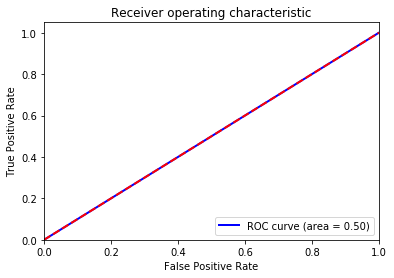

In [39]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Naive Bayes

In [15]:
nb = naive_bayes.BernoulliNB(binarize=3.8)
nb.fit(x_train,y_train)
preds_nb = nb.predict_proba(x_test)
preds_class_nb = nb.predict(x_test)



In [16]:
# Precision score
precision = metrics.average_precision_score(y_test,preds_nb[:,0])
print('Precision Score: ', precision)

# Recall score
recall = metrics.recall_score(y_test,preds_class_nb)
print('Recall Score: ', recall)

# Accuracy
accuracy = accuracy_score(y_test, preds_class_nb)
print("Accuracy: %.2f%% " % (accuracy * 100.0))

# F1 score
f1 = 2*((precision*recall)/(precision+recall))
print('F1 Score: ', f1)

# ROC score
fpr,tpr,thresholds = metrics.roc_curve(y_test,preds_nb[:,1])
roc_auc = metrics.auc(fpr,tpr)
print("ROC Score: ", roc_auc)



Precision Score:  0.9789459936700531
Recall Score:  0.9997844827586206
Accuracy: 98.50% 
F1 Score:  0.9892555106307505
ROC Score:  0.6162208802819318


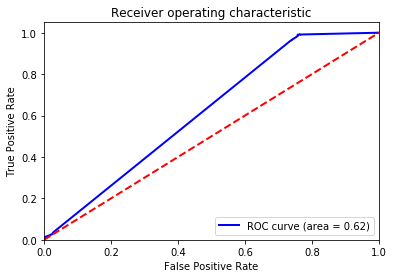

In [17]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Logistic Regression

In [18]:
log_reg = LogisticRegression(C=50,max_iter=100)
log_reg.fit(x_train, y_train)
soft_preds = log_reg.predict_proba(x_test)
hard_preds = log_reg.predict(x_test)
print(soft_preds)

/Users/aditjain/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[1.57123545e-02 9.84287645e-01]
 [1.27737079e-06 9.99998723e-01]
 [8.71126016e-03 9.91288740e-01]
 ...
 [1.65237155e-02 9.83476284e-01]
 [3.41657401e-03 9.96583426e-01]
 [5.90441047e-03 9.94095590e-01]]


In [19]:
# Precision score
precision = metrics.average_precision_score(y_test,soft_preds[:,0])
print('Precision Score: ', precision)

# Recall score
recall = metrics.recall_score(y_test,hard_preds)
print('Recall Score: ', recall)

# Accuracy
accuracy = accuracy_score(y_test, hard_preds)
print("Accuracy: %.2f%% " % (accuracy * 100.0))

# F1 score
f1 = 2*((precision*recall)/(precision+recall))
print('F1 Score: ', f1)

# ROC score
fpr,tpr,thresholds = metrics.roc_curve(y_test,soft_preds[:,1])
roc_auc = metrics.auc(fpr,tpr)
print("ROC Score: ", roc_auc)

Precision Score:  0.9577337050912833
Recall Score:  0.9995869252873564
Accuracy: 98.66% 
F1 Score:  0.9782128432693917
ROC Score:  0.7301192854886774


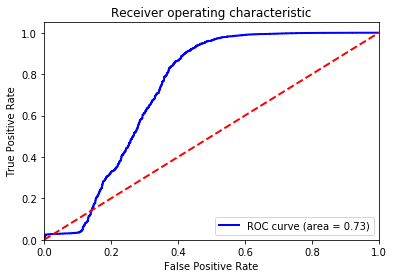

In [20]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**(g) (2 pts)** Downsample the majority class to match the number of samples in the minority class using [sklearn.utils.resample()](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html).   
**(h) (6 pts)** Use the resampled dataset to create a new train/test split with `test_size = 0.25` and run all the models you ran prior to this question. Report the new accuracy, F1 score and AUROC on the test set along with the ROC curve for each model.  
**(i) (6+1=7 pts)** For each of the new models using the resampled dataset, show a scatterplot of the obtained posterior probability estimates  vs. ground truth label value, for the first 500 data points in the test set. What do you notice about the distribution of the Naive Bayes estimated posterior probability values compared to the estimates from Logistic Regression models? 

Instead of using the `scatter()` function from matplotlib, use `stripplot()` from seaborn ([Code](https://stackoverflow.com/a/46802300/)). Use the following parameters in `stripplot()` for best results: `marker='.', jitter=True, size=7`.


With scatter many one cannot distinguish among points that are identical. The jitter function artificially separates points using  small perturbations so it is easier to visualize.

# PART G (Downsampling)

In [52]:
counts = df.loan_status.value_counts()
print(counts)

# class 1 majority class, must downsample

1    222729
0      3338
Name: loan_status, dtype: int64


In [56]:
# sectioning off data points with loan_status = 1 or 0
df_c0 = df[df['loan_status'] == 0]
df_c1 = df[df['loan_status'] == 1]
df_c0.shape
n = counts[0] # 3338
# taking n random samples from set of data points that have loan_status = 1, where n is the number of data points that have loan_status = 0
df_c1_downsample = df_c1.sample(n)
df_downsample = pd.concat([df_c1_downsample, df_c0], axis=0)
print('Random under-sampling:')
print(df_downsample.loan_status.value_counts())

Random under-sampling:
1    3338
0    3338
Name: loan_status, dtype: int64


# PART H + I

In [57]:
y = df_downsample['loan_status']
x = df_downsample.drop(['loan_status'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

# MLP

In [59]:
model = tf.keras.Sequential([
            layers.Dense(32, activation='sigmoid', input_shape=(32,)),
            layers.Dense(8, activation='relu'),
            layers.Dense(1,activation='tanh')])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32,validation_data=(x_test, y_test))

Train on 5007 samples, validate on 1669 samples
Epoch 1/5
5007/5007 [==============================] - 1s 259us/sample - loss: 0.7109 - accuracy: 0.5029 - val_loss: 0.6956 - val_accuracy: 0.4877
Epoch 2/5
5007/5007 [==============================] - 0s 67us/sample - loss: 0.6950 - accuracy: 0.5045 - val_loss: 0.6994 - val_accuracy: 0.4883
Epoch 3/5
5007/5007 [==============================] - 0s 75us/sample - loss: 0.6923 - accuracy: 0.5039 - val_loss: 0.6922 - val_accuracy: 0.4883
Epoch 4/5
5007/5007 [==============================] - 0s 65us/sample - loss: 0.6896 - accuracy: 0.5043 - val_loss: 0.6887 - val_accuracy: 0.4877
Epoch 5/5
5007/5007 [==============================] - 0s 79us/sample - loss: 0.6890 - accuracy: 0.5045 - val_loss: 0.6883 - val_accuracy: 0.4883


In [49]:
model.summary()
score = model.evaluate(x_test,y_test)
print(score)

preds = model.predict(x_test)
preds_class = model.predict_classes(x_test)
print(str(preds_class) + "\n")

# Precision score
precision = metrics.average_precision_score(y_test,preds[:,0])
print('Precision Score: ', precision)

# Recall score
recall = metrics.recall_score(y_test,preds_class)
print('Recall Score: ', recall)

# Accuracy
accuracy = accuracy_score(y_test, preds_class)
print("Accuracy: %.2f%% " % (accuracy * 100.0))

# F1 score
f1 = 2*((precision*recall)/(precision+recall))
print('F1 Score: ', f1)

# ROC score
fpr,tpr,thresholds = metrics.roc_curve(y_test,preds[:,0])
roc_auc = metrics.auc(fpr,tpr)
print("ROC Score: ", roc_auc)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 2,145
Trainable params: 2,145
Non-trainable params: 0
_________________________________________________________________
1669/1669 [==============================] - 0s 84us/sample - loss: 0.6955 - accuracy: 0.4859
[0.6954767845075526, 0.4859197]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]

Precision Score:  0.5446770143173876
Recall Score:  0.0
Accuracy: 48.59% 
F1 Score:  0.0
ROC Score:  0.5404964948738069


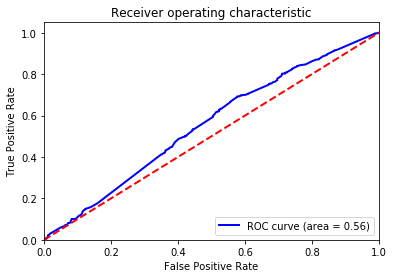

In [26]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

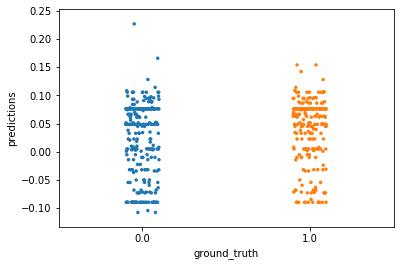

In [27]:
ground_truth = y_test[0:500:].to_numpy()
predictions = preds[0:500:,0]
data = []
data.append(ground_truth)
data.append(predictions)
data = np.asarray(data).T
data = pd.DataFrame(data=data, columns=['ground_truth','predictions'])
ax = sns.stripplot(x="ground_truth", y="predictions", data=data, marker='.', jitter=True, size=7)

# Naive Bayes

In [28]:
nb = naive_bayes.BernoulliNB(binarize=3.9)
nb.fit(x_train,y_train)
preds_nb = nb.predict_proba(x_test)
preds_class_nb = nb.predict(x_test)
print(preds_nb)

[[0.36046707 0.63953293]
 [0.97815842 0.02184158]
 [0.07681067 0.92318933]
 ...
 [0.25095779 0.74904221]
 [0.95299166 0.04700834]
 [0.31858552 0.68141448]]


In [61]:
# Precision score
precision = metrics.average_precision_score(y_test,preds_nb[:,0])
print('Precision Score: ', precision)

# Recall score
recall = metrics.recall_score(y_test,preds_class_nb)
print('Recall Score: ', recall)

# Accuracy
accuracy = accuracy_score(y_test, preds_class_nb)
print("Accuracy: %.2f%% " % (accuracy * 100.0))

# F1 score
f1 = 2*((precision*recall)/(precision+recall))
print('F1 Score: ', f1)

# ROC score
fpr,tpr,thresholds = metrics.roc_curve(y_test,preds_nb[:,1])
roc_auc = metrics.auc(fpr,tpr)
print("ROC Score: ", roc_auc)


Precision Score:  0.5122195250509803
Recall Score:  0.5712616822429907
Accuracy: 49.85% 
F1 Score:  0.5401319110815683
ROC Score:  0.49333264360680995


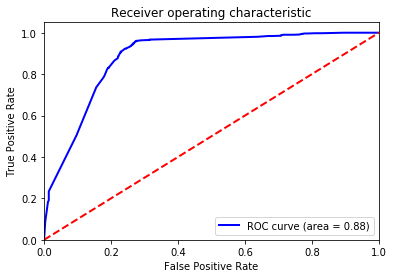

In [30]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


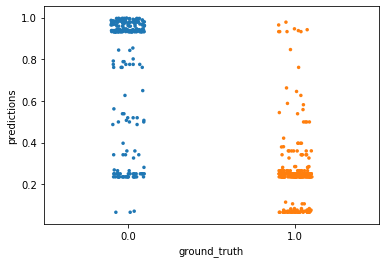

In [31]:
ground_truth = y_test[0:500].to_numpy()
predictions = preds_nb[0:500:,0]

data = []
data.append(ground_truth)
data.append(predictions)
data = np.asarray(data).T

data = pd.DataFrame(data=data, columns=['ground_truth','predictions'])

ax = sns.stripplot(x="ground_truth", y="predictions", data=data, marker='.', jitter=True, size=7)

# Logistic Regression

In [32]:
log_reg = LogisticRegression(C=1,max_iter=110)
log_reg.fit(x_train, y_train)
soft_preds = log_reg.predict_proba(x_test)
hard_preds = log_reg.predict(x_test)
print(soft_preds)

/Users/aditjain/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[0.35042781 0.64957219]
 [0.87648516 0.12351484]
 [0.16680954 0.83319046]
 ...
 [0.48313798 0.51686202]
 [0.2152121  0.7847879 ]
 [0.35736834 0.64263166]]


In [33]:
# Precision score
precision = metrics.average_precision_score(y_test,soft_preds[:,0])
print('Precision Score: ', precision)

# Recall score
recall = metrics.recall_score(y_test,hard_preds)
print('Recall Score: ', recall)

# Accuracy
accuracy = accuracy_score(y_test, hard_preds)
print("Accuracy: %.2f%% " % (accuracy * 100.0))

# F1 score
f1 = 2*((precision*recall)/(precision+recall))
print('F1 Score: ', f1)

# ROC score
fpr,tpr,thresholds = metrics.roc_curve(y_test,soft_preds[:,1])
roc_auc = metrics.auc(fpr,tpr)
print("ROC Score: ", roc_auc)

Precision Score:  0.34525311784835955
Recall Score:  0.7144607843137255
Accuracy: 69.92% 
F1 Score:  0.465540393235248
ROC Score:  0.7563774337402017


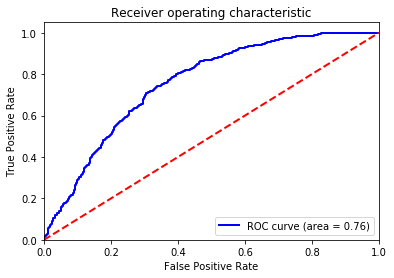

In [34]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

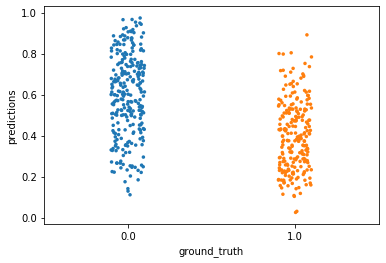

In [35]:
ground_truth = y_test[0:500].to_numpy()
predictions = soft_preds[0:500:,0]

data = []
data.append(ground_truth)
data.append(predictions)
data = np.asarray(data).T

data = pd.DataFrame(data=data, columns=['ground_truth','predictions'])

ax = sns.stripplot(x="ground_truth", y="predictions", data=data, marker='.', jitter=True, size=7)
